# 특성 공학

## 특성 추가
- 평균, 분산, 최대치, 피크치 등을 추가하는 방법
- 선형관계를 유지하는 특성이 필요 (~y)
 - 카테고리 인코딩, 로그변환, 역수변환, x^^2, F = k*x^^2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/StillWork/data/master/car_sales.csv")
df[:3]

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026


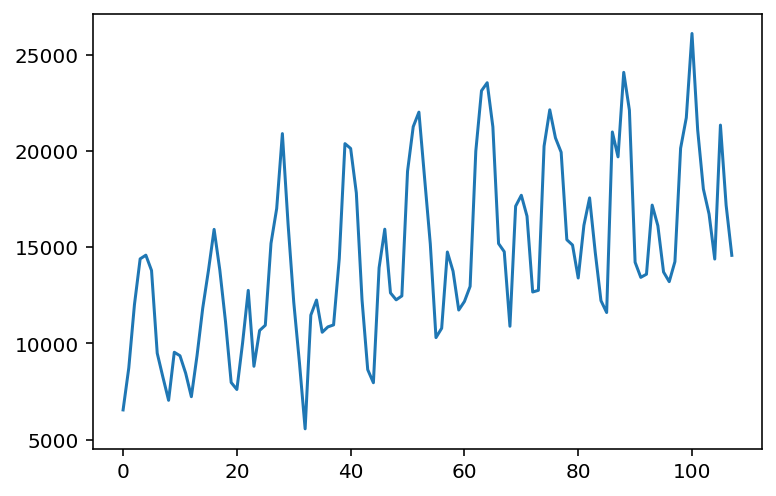

In [3]:
plt.plot(df.Sales)

## 날짜 컬럼 삭제

In [4]:
df = df.drop("Month", axis=1)

In [5]:
df.values

array([[ 6550],
       [ 8728],
       [12026],
       [14395],
       [14587],
       [13791],
       [ 9498],
       [ 8251],
       [ 7049],
       [ 9545],
       [ 9364],
       [ 8456],
       [ 7237],
       [ 9374],
       [11837],
       [13784],
       [15926],
       [13821],
       [11143],
       [ 7975],
       [ 7610],
       [10015],
       [12759],
       [ 8816],
       [10677],
       [10947],
       [15200],
       [17010],
       [20900],
       [16205],
       [12143],
       [ 8997],
       [ 5568],
       [11474],
       [12256],
       [10583],
       [10862],
       [10965],
       [14405],
       [20379],
       [20128],
       [17816],
       [12268],
       [ 8642],
       [ 7962],
       [13932],
       [15936],
       [12628],
       [12267],
       [12470],
       [18944],
       [21259],
       [22015],
       [18581],
       [15175],
       [10306],
       [10792],
       [14752],
       [13754],
       [11738],
       [12181],
       [12965],
       [

## 이동평균 생성

In [6]:
def rolling_average(df, window):
    df_av = df.rolling(window, min_periods=1).mean()
    df_av.columns = [col + "_av" + str(window) for col in df.columns]
    return df_av

x = rolling_average(df, 6);x

,Sales_av6
0,6550.000000
1,7639.000000
2,9101.333333
3,10424.750000
4,11257.200000
...,...
103,20632.166667
104,19673.166667
105,19609.333333
106,18122.833333


In [ ]:
# 컬럼이 2개 이상인 경우 실습

In [7]:
y = rolling_average(df, 12);y

,Sales_av12
0,6550.000000
1,7639.000000
2,9101.333333
3,10424.750000
4,11257.200000
...,...
103,17655.916667
104,17721.500000
105,18067.750000
106,18156.166667


In [8]:
def rolling_std(df, window):
    df_std = df.rolling(window, min_periods=1).std().fillna(0)
    df_std.columns = [col + "_std" + str(window) for col in df.columns]
    return df_std

z = rolling_std(df, 6)
p = rolling_std(df, 12);p[:3]

,Sales_std12
0,0.000000
1,1540.078569
2,2757.023274


In [9]:
z[:3]

,Sales_std6
0,0.000000
1,1540.078569
2,2757.023274


In [10]:
def rolling_max(df, window):
    df_max = df.rolling(window, min_periods=1).max()
    df_max.columns = [col + "_max" + str(window) for col in df.columns]
    return df_max

r = rolling_max(df, 3);r[:3]

,Sales_max3
0,6550.0
1,8728.0
2,12026.0


## 추가 특성 전체 보기

In [11]:
df_all_features = pd.concat([df,x,y,z,p,r], axis=1); df_all_features[:20]

,Sales,Sales_av6,Sales_av12,Sales_std6,Sales_std12,Sales_max3
0,6550,6550.000000,6550.000000,0.000000,0.000000,6550.0
1,8728,7639.000000,7639.000000,1540.078569,1540.078569,8728.0
2,12026,9101.333333,9101.333333,2757.023274,2757.023274,12026.0
3,14395,10424.750000,10424.750000,3474.647932,3474.647932,14395.0
4,14587,11257.200000,11257.200000,3538.325692,3538.325692,14587.0
5,13791,11679.500000,11679.500000,3329.537911,3329.537911,14587.0
6,9498,12170.833333,11367.857143,2546.677633,3149.291107,14587.0
7,8251,12091.333333,10978.250000,2679.623307,3116.973246,13791.0
8,7049,11261.833333,10541.666667,3382.139584,3196.330240,9498.0
9,9545,10453.500000,10442.000000,3046.463770,3029.965640,9545.0


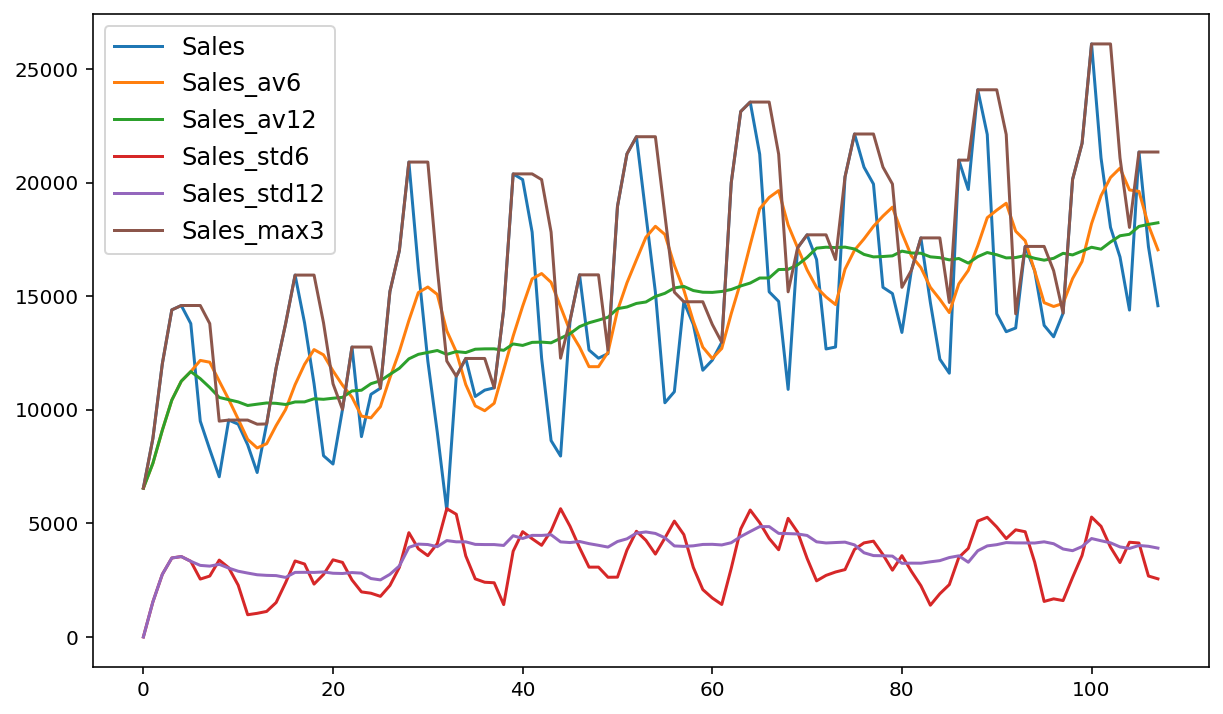

In [12]:
f,ax = plt.subplots(figsize=(10,6))
plt.rc('font', size=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
df_all_features.plot(ax=ax)
plt.legend()
plt.show()

# 피크 값 및 빈도수 찾기

## 랜덤 넘버 생성
- 표준편차: 100
- 샘플 수: 150

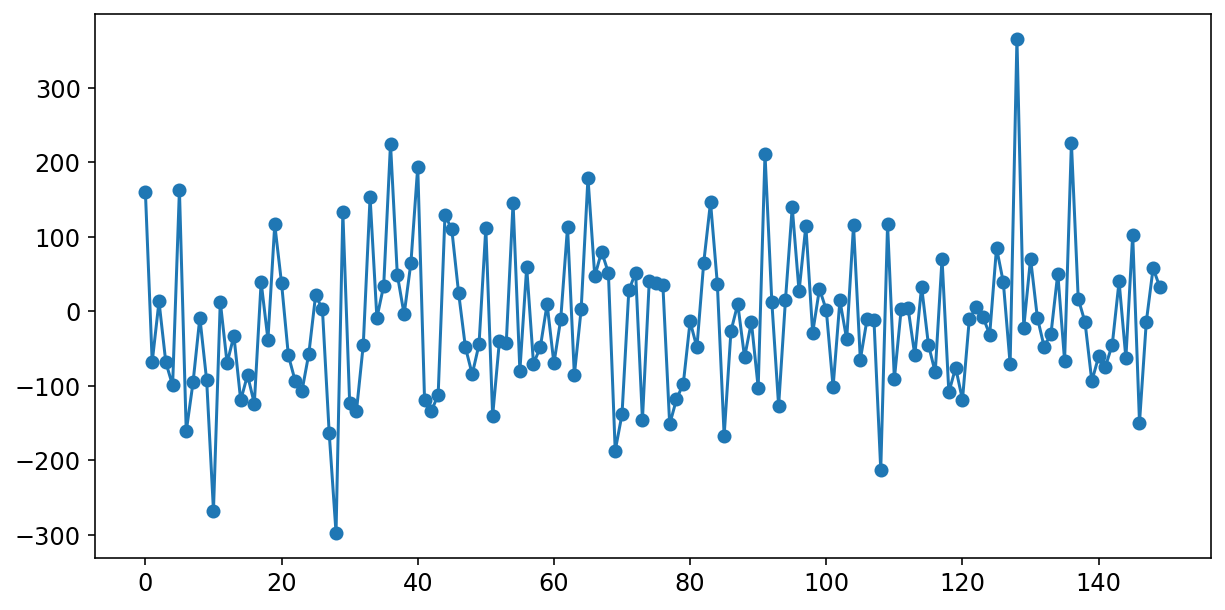

In [13]:
random_seq = np.random.randn(150)*100
f,ax = plt.subplots(figsize=(10,5))

ax.plot(random_seq, marker='o')

In [14]:
def find_peak_global(df, thres):
    df_peak = df[np.abs(df) > thres]
    df_peak.columns = df.columns + '_peak'
    return df_peak

## 입력 데이터 프레임 생성

In [15]:
df_ran = pd.DataFrame(random_seq, columns=["seq"]); df_ran[:3]

,seq
0,160.821639
1,-68.225082
2,13.164686


In [16]:
peak = find_peak_global(df_ran,100);peak

,seq_peak
0,160.821639
1,NaN
2,NaN
3,NaN
4,NaN
...,...
145,103.110012
146,-149.616695
147,NaN
148,NaN


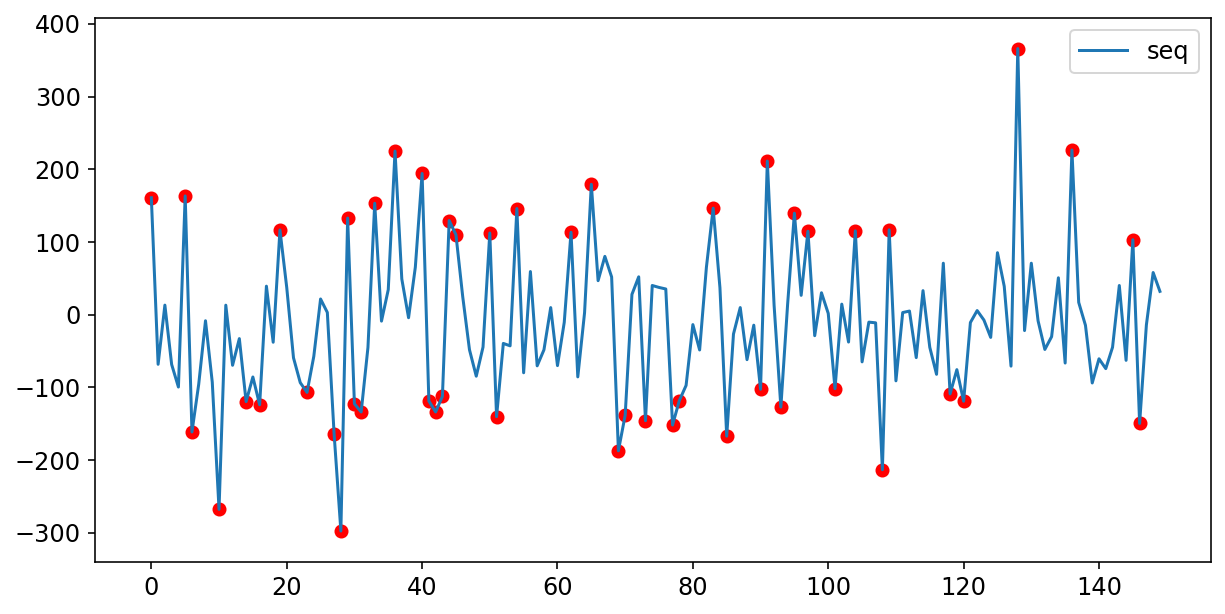

In [17]:
f,ax = plt.subplots(figsize=(10,5))
df_ran.plot(ax=ax)
plt.scatter(range(len(peak)), peak.values, c='r')

In [297]:
# 양의 방향의 피크만 찾는다
# 시그마 값을 바꾸어본다

## 일정 구간 동안 피크의 수를 센다

In [18]:
def find_peak_global_rolling(df, thres, window):
    df_peak = df[np.abs(df) > thres]
    df_peak.columns = df.columns + '_peak'

    df_count = df_peak.rolling(window, min_periods=1).count()
    df_count.columns = df.columns + '_count'+ str(window)
    return df_peak, df_count

In [19]:
peak, p_count = find_peak_global_rolling(df_ran, 120, 10)

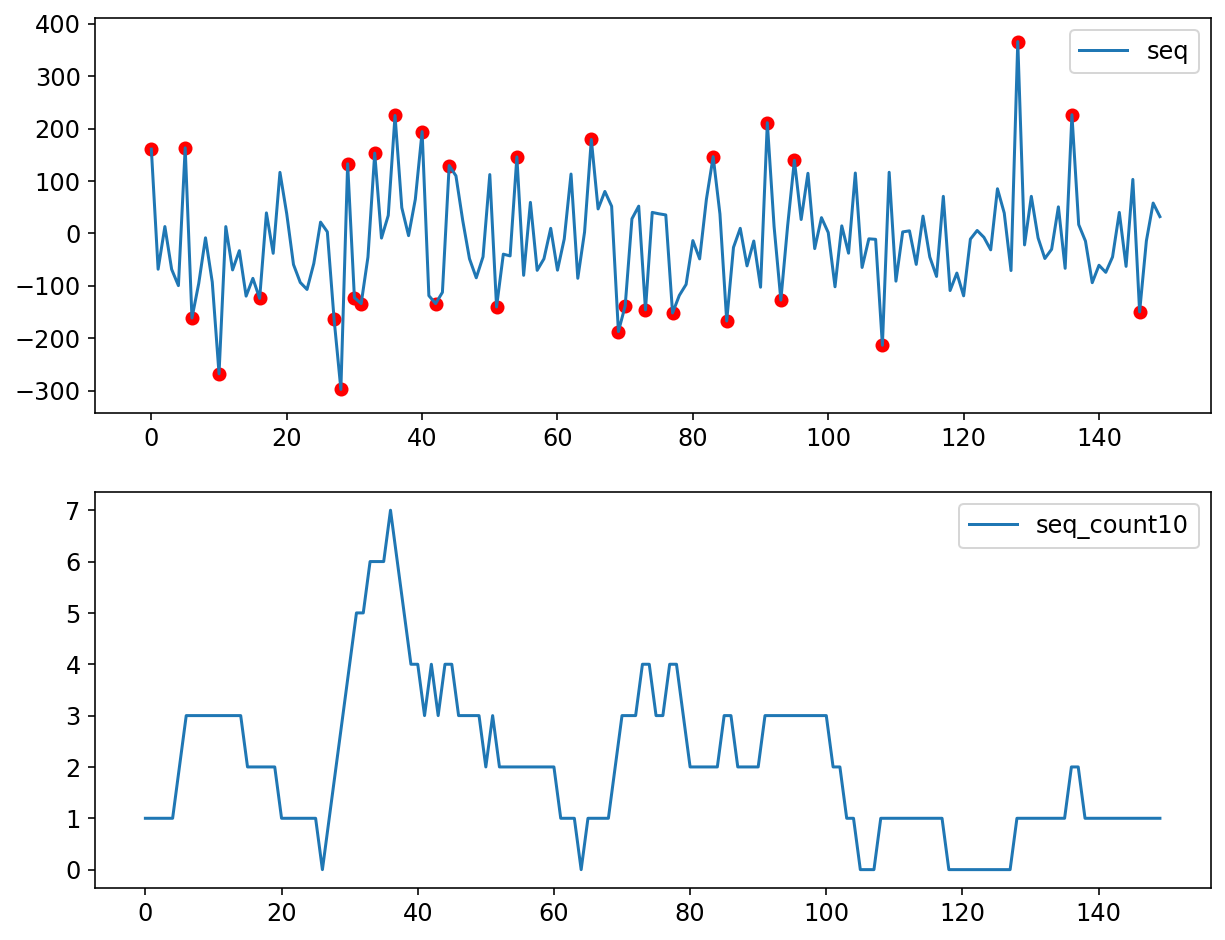

In [20]:
f,(ax1, ax2) = plt.subplots(2, figsize=(10,8))
df_ran.plot(ax=ax1)
ax1.scatter(range(len(peak)), peak, c='r')
p_count.plot(ax=ax2)

## 계절성이 있는 경우

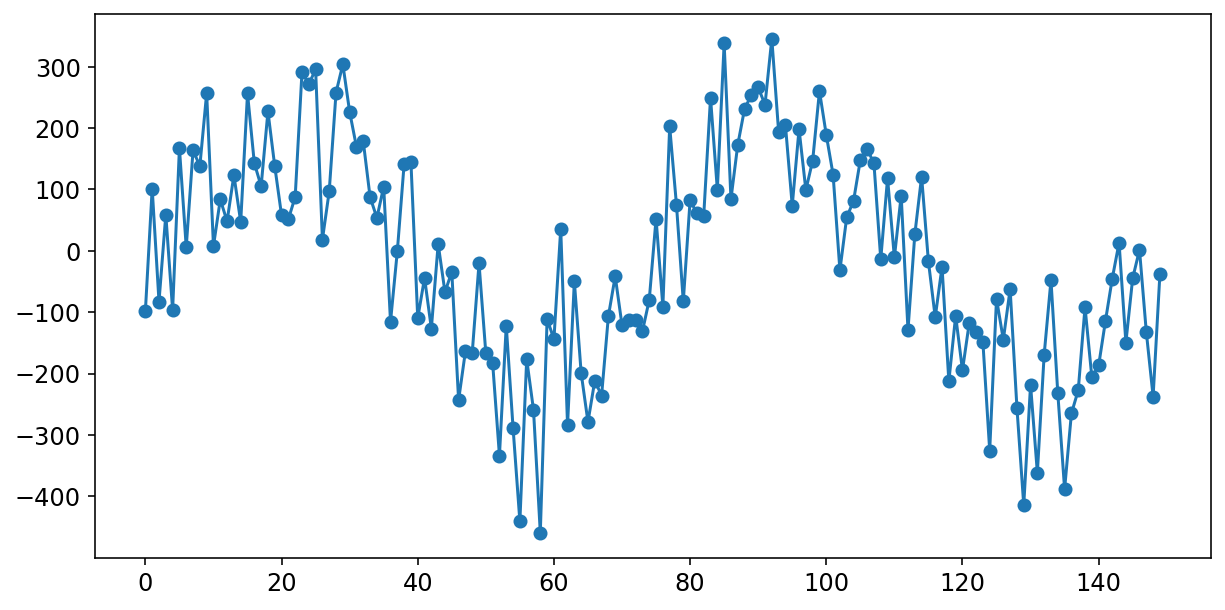

In [21]:
xs = np.linspace(0,np.pi*4,150)
season = np.sin(xs)*200
random_seq_sin = season + np.random.randn(150)*100 

f,ax = plt.subplots(figsize=(10,5))

ax.plot(random_seq_sin, marker='o')

In [22]:
df_ran_sin = pd.DataFrame(random_seq_sin, columns=["seq"]); df_ran_sin[:3]

,seq
0,-98.203245
1,101.540890
2,-82.697747


## 글로벌 피크를 찾으면 문제가 있다
- 로컬 평균을 고려한 피크치를 찾아야 한다

In [23]:
peak, p_count = find_peak_global_rolling(df_ran_sin, 100, 10)

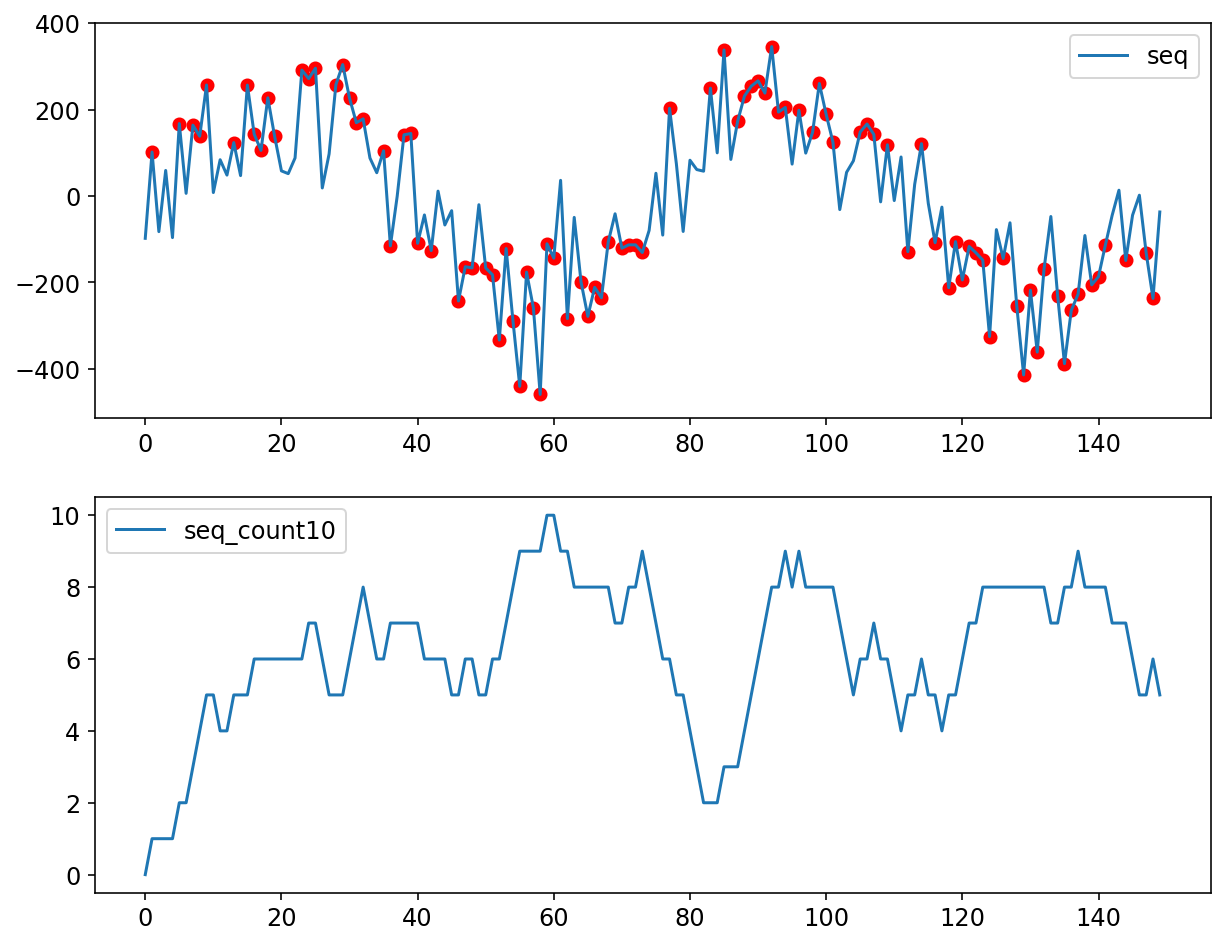

In [24]:
f,(ax1, ax2) = plt.subplots(2, figsize=(10,8))
df_ran_sin.plot(ax=ax1)
ax1.scatter(range(len(peak)), peak, c='r')
p_count.plot(ax=ax2)

In [25]:
def find_peak_local_rolling(df, thres, window):
    df_av = df.rolling(window, min_periods=1).mean()
    df_peak = df[np.abs(df - df_av) > thres]
    df_peak.columns = df.columns + '_peak'+ str(window)

    df_count = df_peak.rolling(window, min_periods=1).count()
    df_count.columns = df.columns + '_local_count'+ str(window)
    return df_peak, df_count

In [28]:
peak, p_count = find_peak_local_rolling(df_ran_sin, 120, 10)

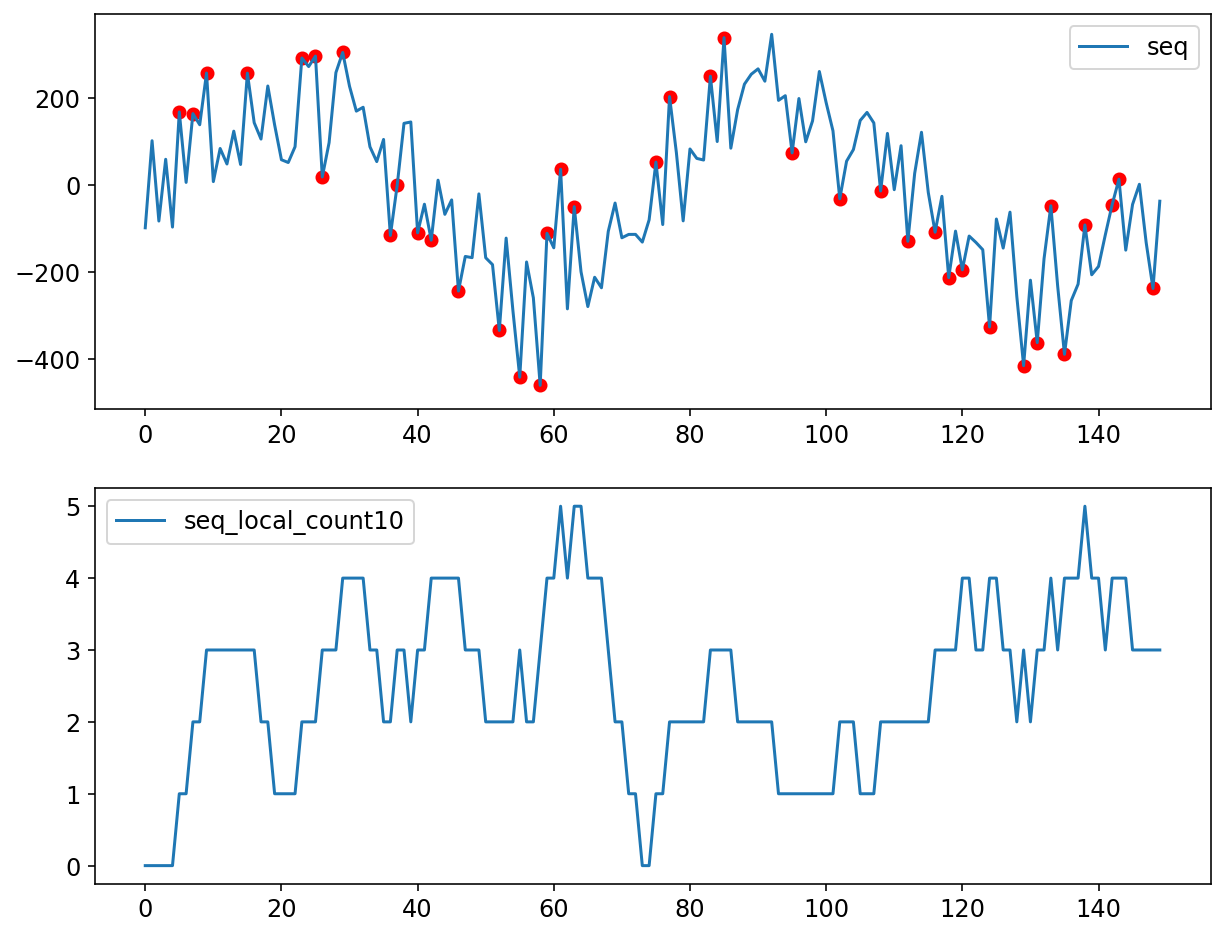

In [29]:
f,(ax1, ax2) = plt.subplots(2, figsize=(10,8))
df_ran_sin.plot(ax=ax1)
ax1.scatter(range(len(peak)), peak, c='r')
p_count.plot(ax=ax2)

In [331]:
p_count[:10]

,seq_local_count10
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
5,1.0
6,1.0
7,2.0
8,3.0
9,3.0


In [ ]:
# 양의 방향의 피크치만 찾는다